# Machine Learning Engineer Nanodegree
## APTOS 2019 Blindness Detection

### 1. Data import

In [1]:
# import pkgs
%load_ext autoreload
%autoreload 2
from src.Images import Images
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

sns.set(style='ticks', color_codes=True)
%matplotlib inline

Using TensorFlow backend.


In [2]:
# get labels
df = pd.read_csv('data/train.csv')
# trim for performance
df = df.iloc[:100,:]

# get images
images = Images(file_path = 'data/train_images/')
images.im_load(df['id_code'])

print('Number of labeled images are {}'.format(df.shape[0]))
print('Number of loaded images are {}'.format(images.data.shape[0]))

print(images.data.shape)

Number of labeled images are 100
Number of loaded images are 100
(100, 224, 224, 1)


### 2. Data Exploration

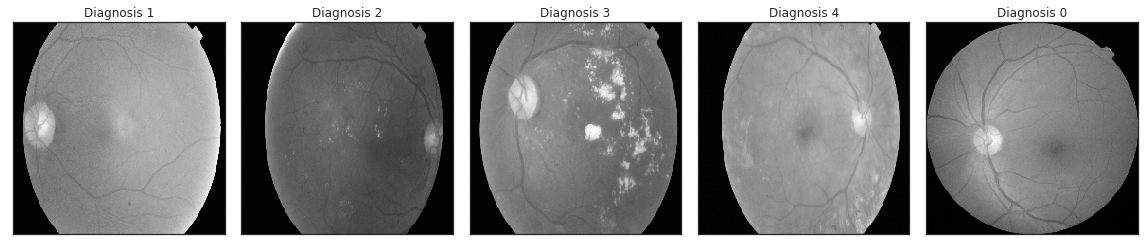

In [5]:
# Plot some example images covering all levels of diagnosis
fig, axs = plt.subplots(1,5, figsize=(16,16))
for idx, label in enumerate(np.sort(df['diagnosis'].unique())):

    code = df[df['diagnosis'] == label].iloc[0,0]
    axs[idx-1].imshow(images.get_im_from_id(code), cmap = 'gray')
    axs[idx-1].set_title('Diagnosis {}'.format(label, fontsize = 20))
    axs[idx-1].set_xticks([])
    axs[idx-1].set_yticks([])
    
plt.tight_layout()
plt.show()

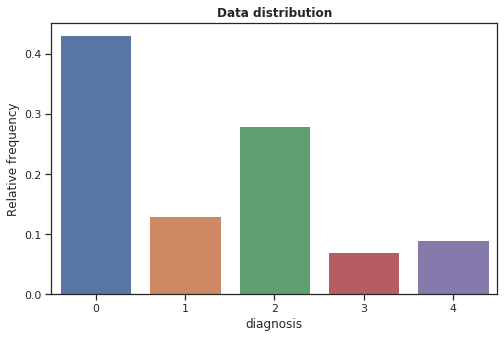

In [8]:
# Figure
fig = plt.figure(figsize=(8,5))
sns.barplot(x="diagnosis",  y="diagnosis", data = df, estimator=lambda x: len(x) / len(df))
plt.ylabel("Relative frequency")
plt.title('Data distribution', fontweight = 'bold')
plt.show()

### 3. Data preprocessing

In [9]:
# One-Hot encoding
y = to_categorical(df['diagnosis'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(images.data, y, test_size = 0.3, random_state = 42)


In [10]:
# Data generator
datagen = ImageDataGenerator(width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            horizontal_flip = True)

datagen.fit(X_train)


### 4. Naive Model

### 5. VGG16